<a href="https://colab.research.google.com/github/JavierPachas/ml-projects/blob/main/ml2_intro_basic_decision_tree_cl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install mglearn

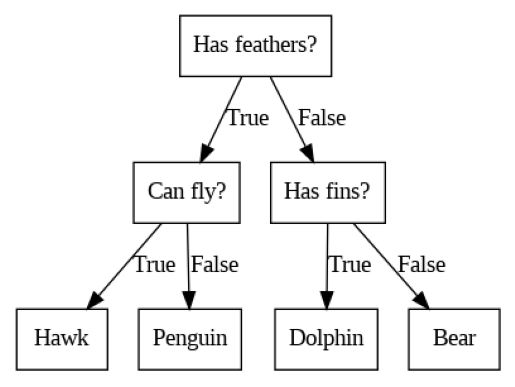

In [3]:
import mglearn
mglearn.plots.plot_animal_tree()

In [5]:
import mglearn
from IPython.display import display
import sklearn

In [ ]:
#Learning a decision tree means learning the sequence of if/else questions that gets us
#to the true answer most quickly. In the machine learning setting, these questions are
#called tests. The tests that are used on continuous data are of the form “Is feature i larger than value a?”

#scikit-learn only implements pre-prunning (limiting maximum depth of tree, limiting the maximum number of leaves, or requiring minimum number of points in a node to keep splitting it)

In [10]:
#building a tree using default setting
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state = 42)

tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train, y_train)

print('Accuracy on training set: {:.3f}'.format(tree.score(X_train, y_train)))
print('Accuracy on test set: {:.3f}'.format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [12]:
#Pre-pruning the tree
#max_depth = 4
tree_p = DecisionTreeClassifier(max_depth = 4, random_state = 0)
tree_p.fit(X_train, y_train)

print('Accuracy on training set with pruning: {:.3f}'.format(tree_p.score(X_train, y_train)))
print('Accuracy on test set with pruning: {:.3f}'.format(tree_p.score(X_test, y_test)))

Accuracy on training set with pruning: 0.988
Accuracy on test set with pruning: 0.951


In [15]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file = "tree.dot", class_names = ['malignant','benign'],
                feature_names = cancer.feature_names, impurity = False, filled = True)


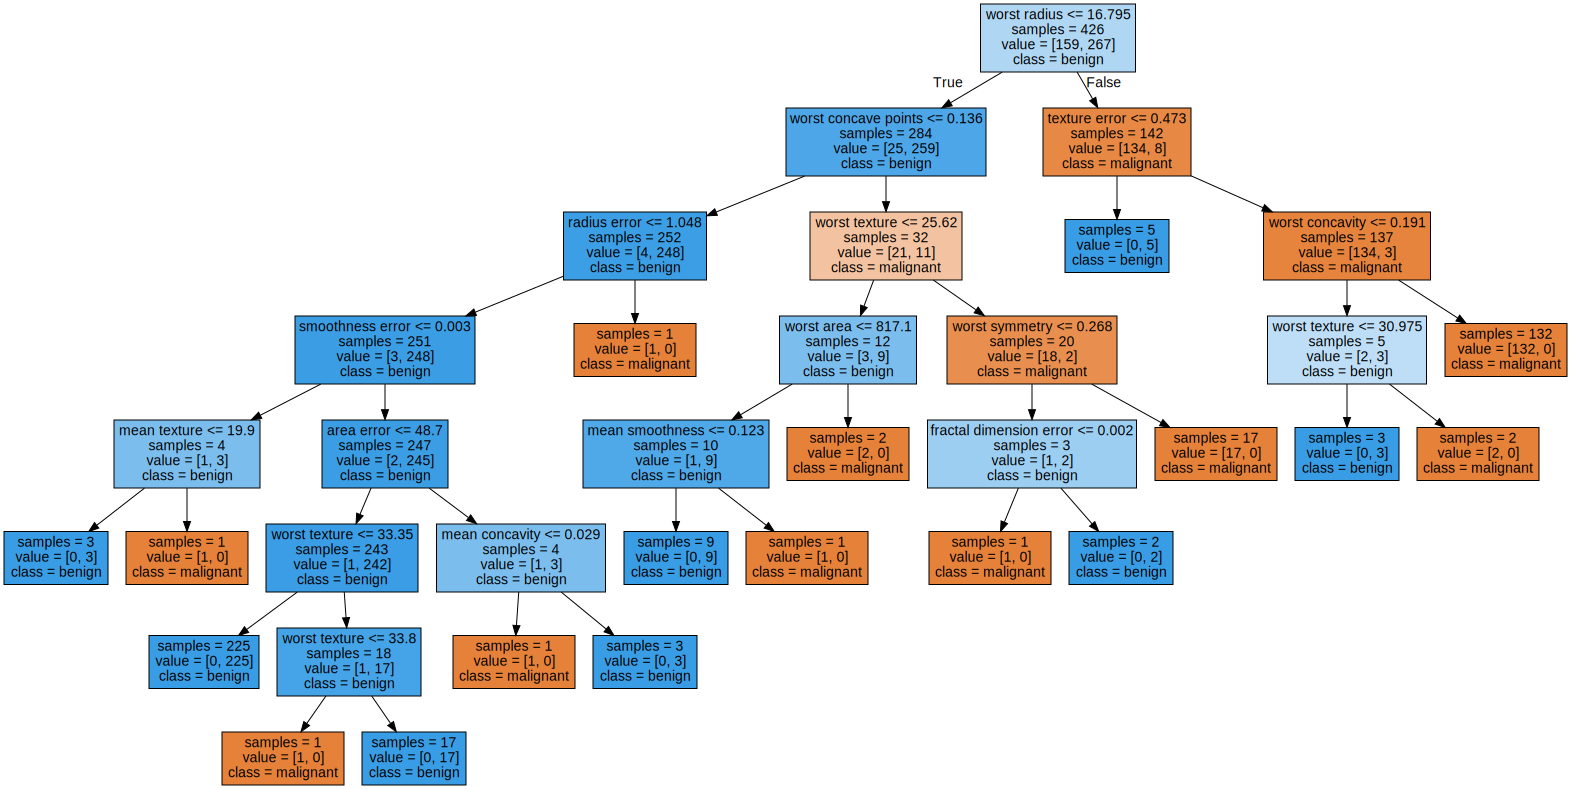

In [16]:
import graphviz
with open('tree.dot') as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

In [17]:
export_graphviz(tree_p, out_file = "tree_p.dot", class_names = ['malignant','benign'],
                feature_names = cancer.feature_names, impurity = False, filled = True)

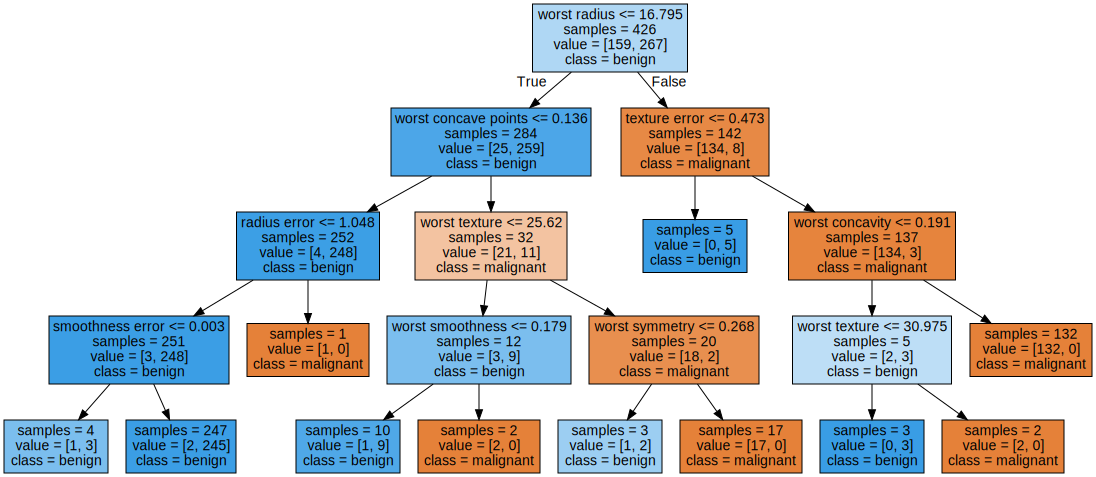

In [18]:
with open('tree_p.dot') as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

In [19]:
#feature importance in tree
print('Feature importances:\n{}'.format(tree_p.feature_importances_))


Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


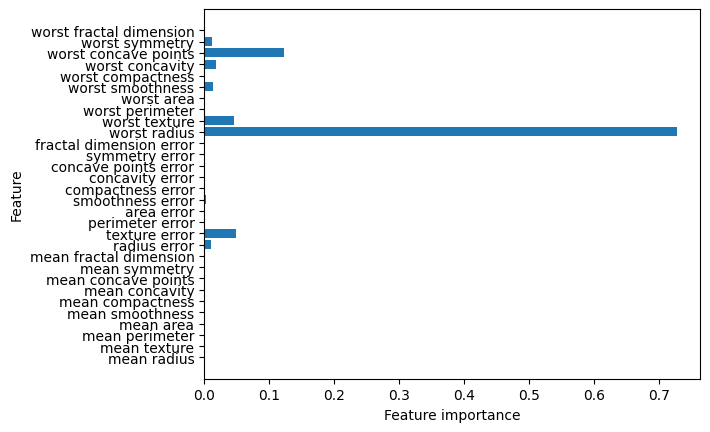

In [22]:
def plot_feature_importances_cancer(model):
  n_features = cancer.data.shape[1]
  plt.barh(range(n_features), model.feature_importances_, align = 'center')
  plt.yticks(np.arange(n_features), cancer.feature_names)
  plt.xlabel('Feature importance')
  plt.ylabel('Feature')

plot_feature_importances_cancer(tree_p)

In contrast to the coefficients in linear models, feature importances are always positive, and don’t encode which class a feature is indicative of. The feature importances tell us that “worst radius” is important, but not whether a high radius is indicative of a sample being benign or malignant.

Feature importances: [0. 1.]


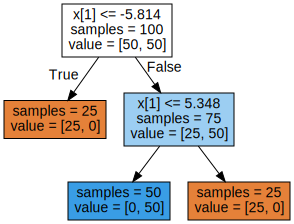

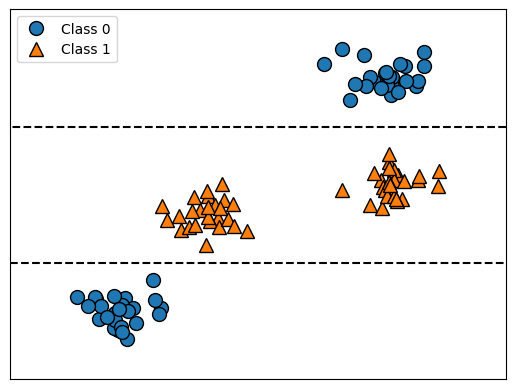

In [23]:
#there might not be such a simple
#relationship between features and class, as you can see in the following example:

tree_example = mglearn.plots.plot_tree_not_monotone()
display(tree_example)

The plot shows a dataset with two features and two classes. Here, all the information is contained in X[1], and X[0] is not used at all. But the relation between X[1] and the output class is not monotonous, meaning we cannot say “a high value of X[0] means class 0, and a low value means class 1” (or vice versa).